Ellipse torsion: 0
Helix torsion: ((-((-exp(t)*sin(t) + exp(t)*cos(t))*(-2*(exp(t)*sin(t) - exp(t)*cos(t))*exp(t)*sin(t) - 2*(exp(t)*sin(t) + exp(t)*cos(t))*exp(t)*cos(t) - exp(2*t))/((exp(t)*sin(t) - exp(t)*cos(t))**2 + (exp(t)*sin(t) + exp(t)*cos(t))**2 + exp(2*t))**(3/2) - 2*exp(t)*sin(t)/sqrt((exp(t)*sin(t) - exp(t)*cos(t))**2 + (exp(t)*sin(t) + exp(t)*cos(t))**2 + exp(2*t)))*((-6*(exp(t)*sin(t) - exp(t)*cos(t))*exp(t)*sin(t) - 6*(exp(t)*sin(t) + exp(t)*cos(t))*exp(t)*cos(t) - 3*exp(2*t))*(-2*(exp(t)*sin(t) - exp(t)*cos(t))*exp(t)*sin(t) - 2*(exp(t)*sin(t) + exp(t)*cos(t))*exp(t)*cos(t) - exp(2*t))*exp(t)/((exp(t)*sin(t) - exp(t)*cos(t))**2 + (exp(t)*sin(t) + exp(t)*cos(t))**2 + exp(2*t))**(5/2) + 2*(-2*(exp(t)*sin(t) - exp(t)*cos(t))*exp(t)*sin(t) - 2*(exp(t)*sin(t) + exp(t)*cos(t))*exp(t)*cos(t) - exp(2*t))*exp(t)/((exp(t)*sin(t) - exp(t)*cos(t))**2 + (exp(t)*sin(t) + exp(t)*cos(t))**2 + exp(2*t))**(3/2) + exp(t)/sqrt((exp(t)*sin(t) - exp(t)*cos(t))**2 + (exp(t)*sin(t) + exp(t)*c

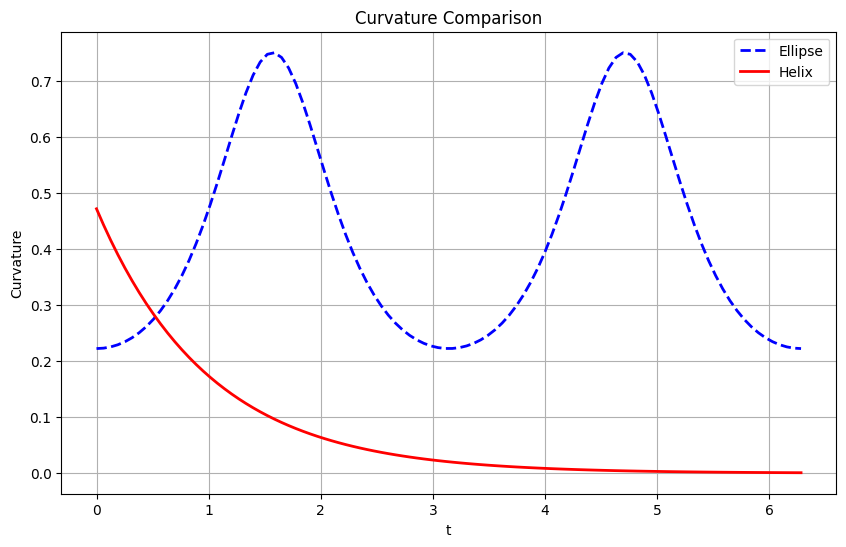

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def compute_curve_properties(r, t):
    r_prime = r.diff(t)
    r_dprime = r_prime.diff(t)
    
    # TNB frame
    T = r_prime / r_prime.norm()
    B = r_prime.cross(r_dprime) / r_prime.cross(r_dprime).norm()
    N = B.cross(T)
    
    # Curvature
    curvature = r_prime.cross(r_dprime).norm() / (r_prime.norm()**3)
    
    # Torsion
    torsion = T.dot(T.diff(t).cross(T.diff(t).diff(t))) / (T.cross(T.diff(t)).norm()**2)
    
    return {
        'r_prime': r_prime,
        'r_dprime': r_dprime,
        'T': T, 'N': N, 'B': B,
        'curvature': curvature,
        'torsion': torsion
    }

def plot_curvatures(curves_data, t_range=(0, 2*np.pi), num_points=100):
    t_vals = np.linspace(t_range[0], t_range[1], num_points)
    
    plt.figure(figsize=(10, 6))
    
    for name, curvature_func, style in curves_data:
        plt.plot(t_vals, curvature_func(t_vals), style, linewidth=2, label=name)
    
    plt.title('Curvature Comparison')
    plt.xlabel('t')
    plt.ylabel('Curvature')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define parameter
t = sp.symbols('t', positive=True)

# Define curves
ellipse = sp.Matrix([2*sp.cos(t), 3*sp.sin(t), 0])
helix = sp.Matrix([sp.exp(t), sp.exp(t)*sp.cos(t), sp.exp(t)*sp.sin(t)])

# Compute properties
ellipse_props = compute_curve_properties(ellipse, t)
helix_props = compute_curve_properties(helix, t)

# Print torsion values
print('Ellipse torsion:', ellipse_props['torsion'])
print('Helix torsion:', helix_props['torsion'])

# Convert curvatures to numpy functions
k_ellipse = sp.lambdify(t, ellipse_props['curvature'], 'numpy')
k_helix = sp.lambdify(t, helix_props['curvature'], 'numpy')

# Plot curvatures
curves_data = [
    ('Ellipse', k_ellipse, 'b--'),
    ('Helix', k_helix, 'r-')
]

plot_curvatures(curves_data)



In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, y = sp.symbols(['x','y'])
f = (y**2)*sp.cos(x-y)
f_x = f.diff(x)
f_y = f.diff(y)
f_xx = f_x.diff(x)
f_yy = f_y.diff(y)
f_xy = f_x.diff(y)
f_yx = f_y.diff(x)
laplace_eq = f_xx + f_yy
if f_xx + f_yy == 0:
    print('Laplace Equation is satisfied')
else:
    print('Laplace Equation is not satisfied')

if f_xy==f_yx:
    print('The identity fxy=fyx is satisfied')
else:
    print('fxy != fyx')

u = sp.re(f)
v = sp.im(f)

if u.diff(x)==v.diff(y) and u.diff(y)==-v.diff(x):
    print('Cauchy-Riemann conditions  satisfied')
else:
    print('Cauchy Riemann conditons not satisfied')


Laplace Equation is not satisfied
The identity fxy=fyx is satisfied
Cauchy Riemann conditons not satisfied


In [ ]:
# t = sp.symbols('t')
# x, y, z , w= sp.symbols(['x', 'y', 'z', 'w'], cls=sp.Function)
# x = sp.cos(t)
# y = sp.sin(t)
# z = sp.tan(t)
# w = sp.sqrt(x**2 + y**2 + z**2)

# dw_dt = w.diff(t)
# print(f"Using the chain rule, the answer at theta (pi/4) is : {dw_dt.subs(t, sp.pi/4).evalf(5)}")

Using the chain rule, the answer at theta (pi/4) is : 1.4142


In [ ]:
t = sp.symbols('t')

# Define x, y, z in terms of t
x = sp.cos(t)
y = sp.sin(t)
z = sp.tan(t)

# Define w
w = sp.sqrt(x**2 + y**2 + z**2)

# Compute dw/dt using the chain rule
dw_dt = w.diff(t)

# Evaluate at t = pi/4
t_val = sp.pi / 4
dw_dt_val = dw_dt.subs(t, t_val)

print(f"Using the chain rule, the answer at theta (pi/4) is : {dw_dt.subs(t, sp.pi/4).evalf(5)}")

Using the chain rule, the answer at theta (pi/4) is : 1.4142
